In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

In [2]:
behaviour = (pd.read_csv("QVI_purchase_behaviour.csv").dropna(how="any"))
transactions = (pd.read_csv("QVI_transaction_data.csv",parse_dates=['DATE']).dropna(how="any"))

In [3]:
transactions.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [4]:
behaviour.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [5]:
data = transactions.merge(behaviour,how='left',on = 'LYLTY_CARD_NBR').sort_values("LYLTY_CARD_NBR")

In [6]:
data.pivot_table(values='TOT_SALES',index='LIFESTAGE',aggfunc=['sum','count','mean'])

,sum,count,mean
,TOT_SALES,TOT_SALES,TOT_SALES
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,184751.30,25110,7.357678
NEW FAMILIES,50433.45,6919,7.289124
OLDER FAMILIES,353767.20,48596,7.279760
OLDER SINGLES/COUPLES,402426.75,54479,7.386823
RETIREES,366470.90,49763,7.364325
YOUNG FAMILIES,316160.10,43592,7.252709
YOUNG SINGLES/COUPLES,260405.30,36377,7.158515


In [7]:
##Identifying Outliers and Removing them

In [8]:
sales_count= data['TOT_SALES'].value_counts()
sales_data = data['TOT_SALES']

In [9]:
lower_bound = 0.025
upper_bound = 0.975
quant = sales_data.quantile([lower_bound,upper_bound])

In [10]:
new_index = (quant.loc[lower_bound] < data.TOT_SALES.values) & (quant.loc[upper_bound] > data.TOT_SALES.values)

In [11]:
data = data[new_index].sort_values("TOT_SALES",ascending=False)

In [12]:
## Identifying customer segments and visualization

In [13]:
customer_seg = data.groupby("LIFESTAGE")
countseg = customer_seg['TOT_SALES'].count()

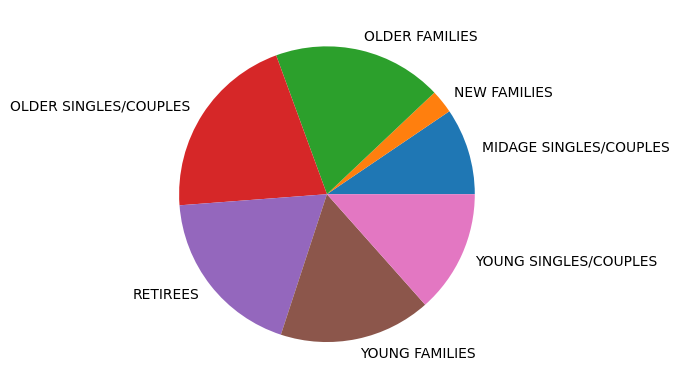

In [14]:
plt.pie(countseg,labels = countseg.index)
plt.show()

In [15]:
## Identifying customer spendings and visualization

In [16]:
customer_spending = customer_seg['TOT_SALES'].sum()

Text(0, 0.5, 'Segment spending')

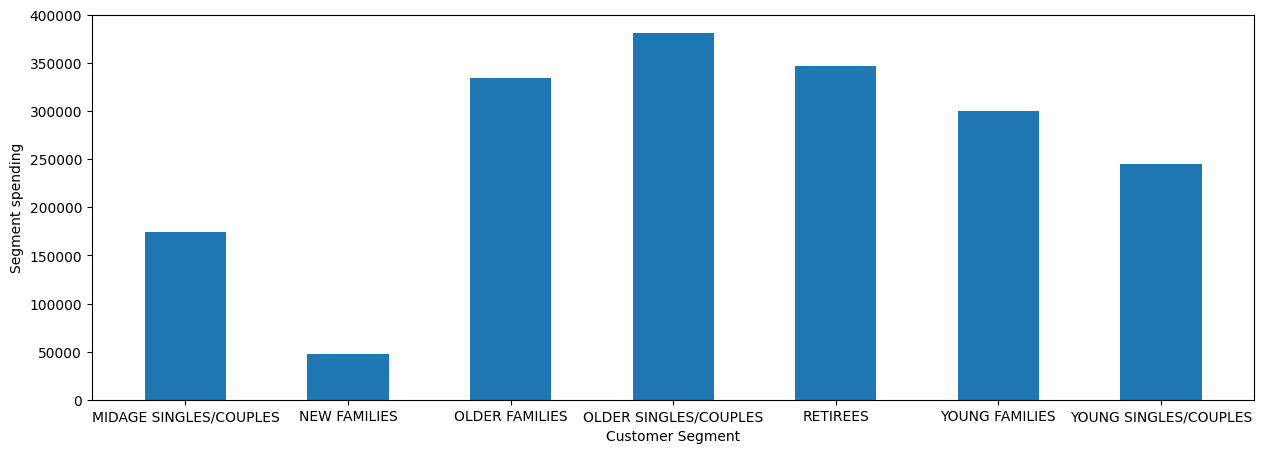

In [26]:
plt.figure(figsize=(15,5))
plt.tick_params(axis='x', which='major',)
plt.bar(countseg.index,customer_spending,width=0.5)
# ylim([customer_spending.min()*1.2,customer_spending.max()*1.1])
plt.xlabel('Customer Segment')
plt.ylabel('Segment spending')

In [30]:
data2 = pd.read_csv("QVI_data.csv",parse_dates=['DATE']).dropna(how='any')
data2

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [19]:
total_sales_rev = int(data2['TOT_SALES'].sum())
total_customers = data2['TXN_ID'].nunique()

In [20]:
# Comparing Stores location and their top customer segment

In [21]:
stores = data2.groupby("STORE_NBR")
number_of_Stores = stores['STORE_NBR'].nunique().count()

In [22]:
#Finding top sales stores
stores['TOT_SALES'].sum().sort_values(ascending=False)

STORE_NBR
226    17605.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
         ...   
206        7.60
252        7.40
11         6.70
76         6.00
211        5.20
Name: TOT_SALES, Length: 272, dtype: float64

In [125]:
stores_stage = data2.groupby(['STORE_NBR','LIFESTAGE']).agg({'TOT_SALES':'sum'}).unstack()

In [126]:
stores_stage.idxmax(axis=1)

STORE_NBR
1      (TOT_SALES, YOUNG SINGLES/COUPLES)
2      (TOT_SALES, YOUNG SINGLES/COUPLES)
3      (TOT_SALES, OLDER SINGLES/COUPLES)
4      (TOT_SALES, OLDER SINGLES/COUPLES)
5             (TOT_SALES, OLDER FAMILIES)
                      ...                
268                 (TOT_SALES, RETIREES)
269           (TOT_SALES, YOUNG FAMILIES)
270           (TOT_SALES, OLDER FAMILIES)
271           (TOT_SALES, OLDER FAMILIES)
272    (TOT_SALES, YOUNG SINGLES/COUPLES)
Length: 272, dtype: object